# Introduction:
Our group project aims to determine which "kinds" of players are most likely to contribute a large amount of data by analyzing play time with personal history with Minecraft so that the research group can target those players in their recruiting efforts.


# The Data Sets:

 `players.csv` dataset contains 196 observations and 9 variables. <br><br>
         Variables: <br>
        <blockquote>`Experience`: What their previous experience with Minecraft is <br> 
        `Subscribe`: If they are subscribed to email updates or not <br>
        `HashedEmail`: encrypted format of their email <br>
        `Name`: Name on plaicraft.ai <br>
        `Gender`: recorded gender <br>
        `Age`: recorded age <br>
        `individualID`: individual id if available <br>
        `organizationName`: Name of associated organization if available <br>
        `played_hours`: total hours contributed on plaicraft.ai<br></blockquote>

    
`game_time.csv` has 1535 rows and 5 variables: <br><br>
    Variables: <br>
    <blockquote>`hashedEmail`: encrypted format of their email<br>
    `start_time`: start time of session<br>
    `end_time`:end time of session<br>
    `original_start_time`: start time of session in reference to POSIX<br>
    `original_end_time`: end time of session in reference to POSIX</blockquote>

In [14]:
#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)

In [4]:
url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
play_data <- read_csv(url1)
session_data <- read_csv(url2)
glimpse(play_data)
glimpse(session_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22…
$ individualId     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ organizationName <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/2

In [12]:
play_data_select <- play_data|>
                     select(-individualId, -organizationName)

session_data_select <- session_data |>
                        mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
                        end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
                        select(-original_start_time, -original_end_time)
                        combined_data <- left_join(play_data_select, session_data_select, by = "hashedEmail")

glimpse(combined_data)
glimpse(play_data_select)

Rows: 1,606
Columns: 9
$ experience   <chr> "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", "…
$ subscribe    <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRU…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30.…
$ name         <chr> "Morgan", "Morgan", "Morgan", "Morgan", "Morgan", "Morgan…
$ gender       <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", "…
$ age          <dbl> 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, …
$ start_time   <dttm> 2024-08-08 00:21:00, 2024-09-09 22:30:00, 2024-08-08 02:…
$ end_time     <dttm> 2024-08-08 01:35:00, 2024-09-09 22:37:00, 2024-08-08 03:…
Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728

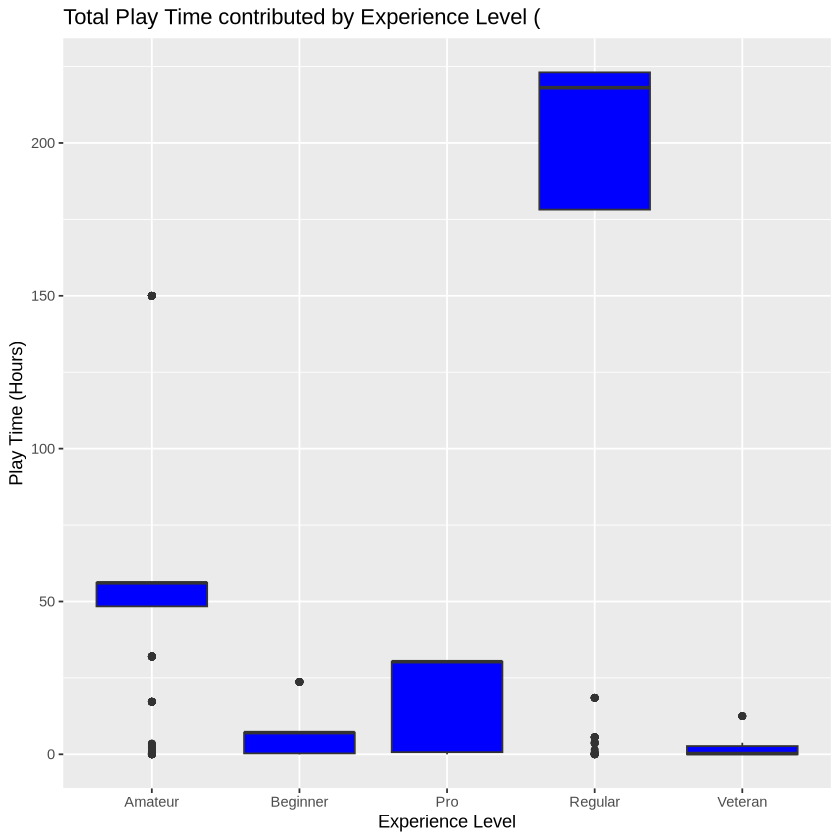

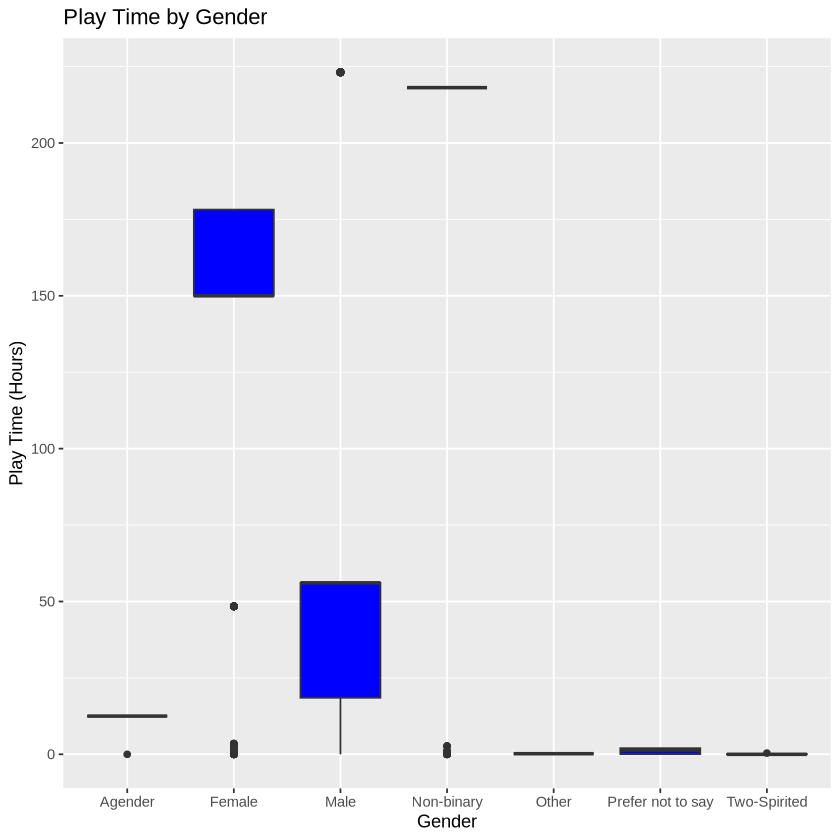

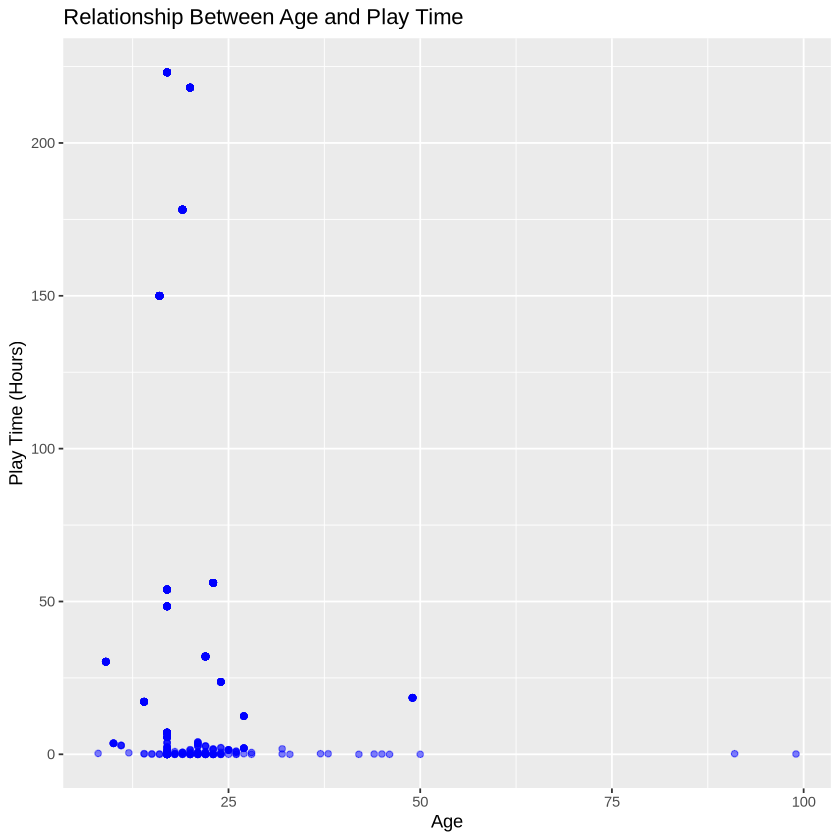

In [11]:
plot1 <- ggplot(combined_data, aes(x = experience, y = played_hours)) +
         geom_boxplot(fill = "blue") +
         labs(
              title = "Total Play Time contributed by Experience Level (",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )
plot2 <- ggplot(combined_data, aes(x = gender, y = played_hours)) +
         geom_boxplot(fill = "blue") +
         labs(
              title = "Play Time by Gender",
              x = "Gender",
              y = "Play Time (Hours)"
              )
plot3 <- ggplot(combined_data, aes(x = age, y = played_hours)) +
         geom_point(alpha = 0.5, color = "blue") +
         labs(
              title = "Relationship Between Age and Play Time",
              x = "Age",
              y = "Play Time (Hours)"
              ) 

plot1 
plot2
plot3